# 1. Import packages and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb
import scikitplot as skplt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import preprocessing
import warnings
#plt.style.use(['dark_background'])
%matplotlib inline
warnings.filterwarnings('ignore')

/home/angps/anaconda3/envs/angps/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/angps/anaconda3/envs/angps/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [3]:
direc = "/home/angps/Documents/Data-Analysis-Blog/WNS_Analytics_Hackathon/"
train = pd.read_csv(direc + "train_LZdllcl.csv")
test = pd.read_csv(direc + "test_2umaH9m.csv")

# **2. Exploratory Analysis**

In [79]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
train.shape

(54808, 14)

In [6]:
train.describe()  #5-number summary for numerical columns

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


**2.1 Let's start by visualising the distribution of each columns.**

**2.1.1 Promotion Rate**

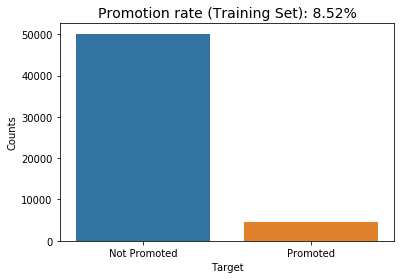

In [7]:
ax = sns.countplot(train["is_promoted"])
plt.xlabel("Target")
plt.xticks([0,1],["Not Promoted","Promoted"])
plt.ylabel("Counts")
plt.title("Promotion rate (Training Set): " + str(round(100*(sum(train["is_promoted"]==1)/train.shape[0]),2)) +"%",fontsize=14)
for txt in ax.texts:
    txt.set_visible(False)

**2.1.2 Gender Distribution**

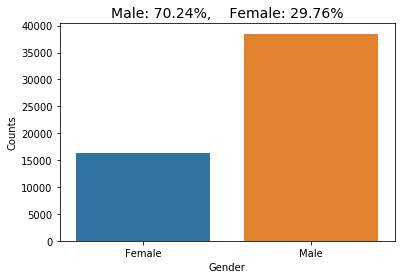

In [8]:
ax = sns.countplot(train["gender"])
plt.xlabel("Gender")
plt.ylabel("Counts")
ax.set_xticklabels(["Female","Male"])
plt.title("Male: " + str(round(100*(sum(train["gender"]=="m")/train.shape[0]),2)) 
          + "%,    Female: " + str(round(100-100*(sum(train["gender"]=="m")/train.shape[0]),2))+"%",fontsize=14)
for txt in ax.texts:
    txt.set_visible(False)

**2.1.3 Age Distribution**

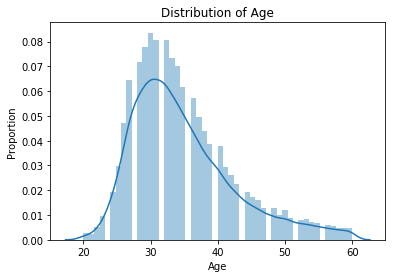

In [9]:
sns.distplot(train["age"],norm_hist=False)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Proportion")
for txt in ax.texts:
    txt.set_visible(False)

We can see that the distribution of age is slightly skewed to the right. The mean age is around 34.8 while the median age is 33 based on the 5-number summary. 

**2.1.4 Departments**

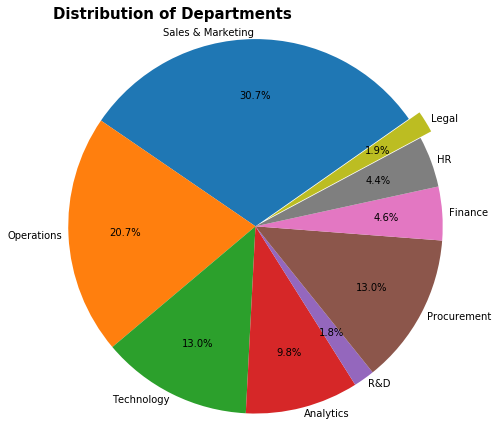

In [60]:
plt.figure(figsize=(6,6))
labels=list(train["department"].unique())
sizes=[sum(train["department"]==x) for x in labels]
plt.pie(sizes, labels=labels, radius=1.5,labeldistance=1.035,
        autopct='%1.1f%%',startangle=35, pctdistance=0.7, explode=(0,0,0,0,0,0,0,0,0.1))
plt.axis('equal')
plt.tight_layout()
plt.title('Distribution of Departments', loc="left",fontsize=15,fontweight="bold")
plt.show()

**2.1.5 Education Distribution**

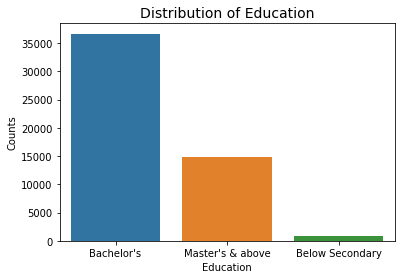

In [63]:
ax = sns.countplot(train["education"],order = train['education'].value_counts().index)
plt.xlabel("Education")
plt.ylabel("Counts")
plt.title("Distribution of Education",fontsize=14)
for txt in ax.texts:
    txt.set_visible(False)

**2.1.6 Length Of Service**

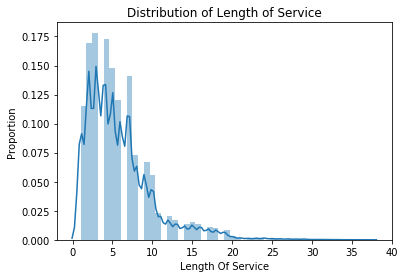

In [64]:
sns.distplot(train["length_of_service"],norm_hist=False)
plt.title("Distribution of Length of Service")
plt.xlabel("Length Of Service")
plt.ylabel("Proportion")
for txt in ax.texts:
    txt.set_visible(False)

The distribution of the length of service is also right-skewed, with the mean 5.8 years and the median 5 years.

**2.1.7 Awards Won**

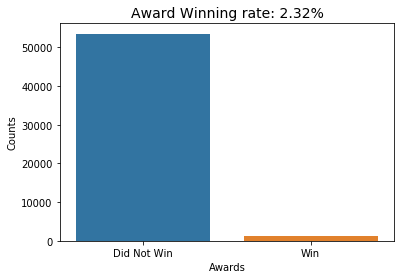

In [69]:
ax = sns.countplot(train["awards_won?"])
plt.xlabel("Awards")
plt.xticks([0,1],["Did Not Win","Win"])
plt.ylabel("Counts")
plt.title("Award Winning rate: " + str(round(100*(sum(train["awards_won?"]==1)/train.shape[0]),2)) +"%",fontsize=14)
for txt in ax.texts:
    txt.set_visible(False)

**2.1.8 KPI Met**

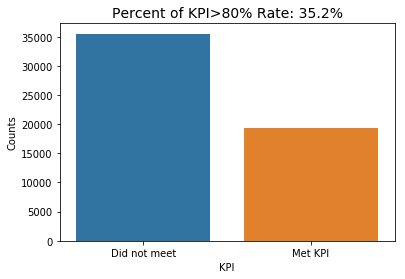

In [72]:
ax = sns.countplot(train["KPIs_met >80%"])
plt.xlabel("KPI")
plt.xticks([0,1],["Did not meet","Met KPI"])
plt.ylabel("Counts")
plt.title("Percent of KPI>80% Rate: " + str(round(100*(sum(train["KPIs_met >80%"]==1)/train.shape[0]),2)) +"%",fontsize=14)
for txt in ax.texts:
    txt.set_visible(False)

**2.1.9 Recruitment Channel**

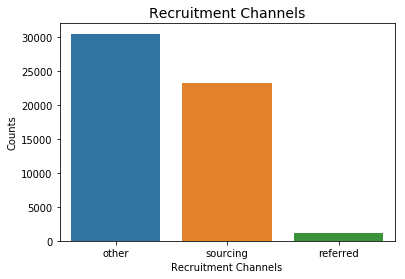

In [73]:
ax = sns.countplot(train["recruitment_channel"],order = train['recruitment_channel'].value_counts().index)
plt.xlabel("Recruitment Channels")
plt.ylabel("Counts")
#ax.set_xticklabels(["Female","Male"])
plt.title("Recruitment Channels",fontsize=14)
for txt in ax.texts:
    txt.set_visible(False)

**2.1.10 Trainings**

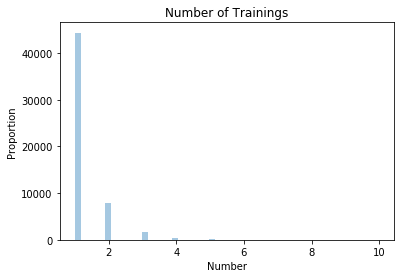

In [77]:
sns.distplot(train["no_of_trainings"],kde=False)
plt.title("Number of Trainings")
plt.xlabel("Number")
plt.ylabel("Proportion")
for txt in ax.texts:
    txt.set_visible(False)

**2.1.11 Average Training Score**

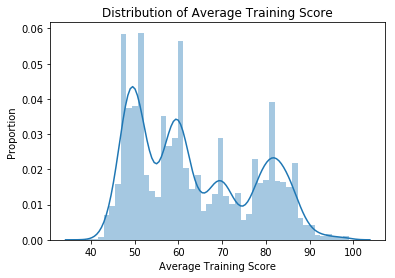

In [78]:
sns.distplot(train["avg_training_score"],norm_hist=False)
plt.title("Distribution of Average Training Score")
plt.xlabel("Average Training Score")
plt.ylabel("Proportion")
for txt in ax.texts:
    txt.set_visible(False)

**2.2 Comparing Promotion Rate among different variables**

In [80]:
def promotion_stacked_bar(variable):
    no_promo=round(train[train["is_promoted"]==0][variable].value_counts()/len(train["is_promoted"]==0),2)
    promo=round(train[train["is_promoted"]==1][variable].value_counts()/len(train["is_promoted"]==1),2)
    data=pd.DataFrame([no_promo,promo])
    data.index=["Not Promoted","Promoted"]
    data.plot(kind="bar",stacked=True,title="Percentage")
    return data.head()

,m,f
Not Promoted,0.64,0.27
Promoted,0.06,0.03


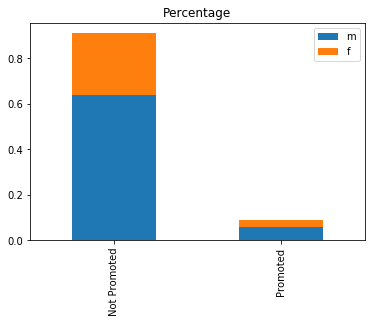

In [81]:
promotion_stacked_bar("gender")

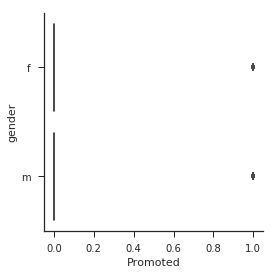

In [85]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "is_promoted", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

In [84]:
sns.set()
train.set_index('employee_id').T.plot(kind='bar', stacked=True)

KeyboardInterrupt: 

**Checking for missing values**

In [12]:
for i in train.columns:
    print (i + ": "+str(sum(train[i].isnull()))+" missing values")

employee_id: 0 missing values
department: 0 missing values
region: 0 missing values
education: 2409 missing values
gender: 0 missing values
recruitment_channel: 0 missing values
no_of_trainings: 0 missing values
age: 0 missing values
previous_year_rating: 4124 missing values
length_of_service: 0 missing values
KPIs_met >80%: 0 missing values
awards_won?: 0 missing values
avg_training_score: 0 missing values
is_promoted: 0 missing values
